<a href="https://colab.research.google.com/github/miranishilva/Data-Science-in-Retail-Market-Basket-Analysis/blob/main/Market_Basket_Analysis_Data_Transaksi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages("arules")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library("arules")

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write




In [3]:
transaksi <- read.transactions(file="https://storage.googleapis.com/dqlab-dataset/data_transaksi2.txt", format="single", sep="\t", cols=c(1,2), skip=1)
transaksi

transactions in sparse format with
 1000 transactions (rows) and
 70 items (columns)

# **Melihat Itemset per Transaksi dengan Inspect**
Tiap transaksi terdiri atas beberapa item atau itemset. Pada praktek sebelumnya, kita baru melihat visualisasi dan sebaran matrix dari tiap transaksi namun masih sulit dicerna.

Untuk melihat notasi itemset yang lebih baik dan mudah dimengerti kita bisa menggunakan function inspect.

In [4]:
inspect(transaksi)

       items                              transactionID
[1]    {Baju Kaos Olahraga,                            
        Baju Renang Pria Dewasa,                       
        Baju Renang Wanita Dewasa,                     
        Celana Jogger Casual,                          
        Dompet Card Holder,                            
        Kaos,                                          
        Sepatu Sport merk Z,                           
        Serum Vitamin,                                 
        Shampo Biasa}                             #1   
[2]    {Baju Batik Wanita,                             
        Baju Kemeja Putih,                             
        Celana Jogger Casual,                          
        Celana Pendek Jeans,                           
        Dompet Card Holder,                            
        Dompet STNK Gantungan,                         
        Flat Shoes Ballerina,                          
        Hair Dryer,                             

# **Menghasilkan Rules dengan Apriori**
Saatnya kita menghasilkan rule dari transaksi kita. Seperti dijelaskan pada bab tiga, rule adalah formula yang menyatakan kombinasi dari dua itemset. Satu itemset ada di bagian kiri rule (left hand side) dan satunya di bagian kanan (right hand side)

In [5]:
apriori(transaksi)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 100 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[70 item(s), 1000 transaction(s)] done [0.00s].
sorting and recoding items ... [40 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [4 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 4 rules 

In [6]:
inspect(apriori(transaksi, parameter = list(support=.03, minlen=2, target='frequent itemsets')))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
         NA    0.1    1 none FALSE            TRUE       5    0.03      2
 maxlen            target  ext
     10 frequent itemsets TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 30 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[70 item(s), 1000 transaction(s)] done [0.00s].
sorting and recoding items ... [56 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.00s].
sorting transactions ... done [0.00s].
writing ... [1248 set(s)] done [0.00s].
creating S4 object  ... done [0.00s].
       items                              support transIdenticalToItemsets count
[1]    {Shampo Biasa,                                                           
        Tas Makeup}                         0.031           

# **Melihat Rules dengan fungsi inspect**
Di awal bab, kita bisa melihat daftar transaksi dengan menggunakan fungsi inspect. Selain transaksi, fungsi ini bisa digunakan juga untuk melihat isi dari association rules yang dihasilkan oleh fungsi apriori.
Terlihat kalau variable mba menyimpan tiga rules dengan kolom-kolom berikut:

*   lhs: itemset di bagian kiri (left hand side)
*   rhs: itemset di bagian kanan (right hand side)
*   support, confidence dan lift: metrik-metrik yang digunakan untuk menilai kualitas dari rule. Umumnya semakin besar semakin baik. Detil dari metrik-metrik ini akan dibahas pada bab berikutnya.

Kalau fokus kita kembali ke itemset lhs dan rhs untuk product packaging, terlihat rule kedua yaitu {Pet Food} => {Sirup} cukup menarik.

Kenapa bisa dikatakan menarik?

Karena support 0.4 menunjukkan bahwa kombinasi ini terdapat di 40 persen poulasi - berarti 4 dari 10 transaksi untuk dataset kita. Nilai lift juga di atas 1, yang artinya rule ini memiliki asosiasi tinggi antar itemset yang terdapat di rule ini.

Sedangkan {} => {Teh Celup} tidak menarik karena hanya berisi satu item. Rule sisanya, {Gula, Peta Food} = > {Sirup} terlalu unik - ini ditunjukkan dengan support 0.1 (10%) yang artinya hanya terdapat di 1 dari 10 transaksi.

Apa makna dari rule jika ingin kita aplikasikan?

Artinya ada beberapa opsi action item yang bisa kita lakukan:

rekomendasikan kepada setiap pelanggan yang membeli Pet Food untuk membeli Sirup.
rak display Pet Food dan Sirup bisa didekatkan.
Pet Food dan Sirup dipaketkan bersama dan dijual dengan harga khusus.

In [7]:
mba <- apriori(transaksi)
inspect(mba)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 100 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[70 item(s), 1000 transaction(s)] done [0.00s].
sorting and recoding items ... [40 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [4 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
    lhs                            rhs             support confidence coverage     lift count
[1] {Tas Waist Bag}             => {Serum Vitamin}   0.136  0.8447205    0.161 1.656315   136
[2] {Celana Jeans Sobek Wanita} => {Shampo Biasa}    0.209  0.8708333    0.240 1.441777   209
[3] {C

# **Filter RHS dan LHS**
Ini penting untuk bisnis, misalkan untuk inventory. Kita ingin menjawab, adakah item yang kurang laku sebelumnya ada di dalam itemset dari rules yang dihasilkan oleh apriori? Jika ada, mungkin saya bisa paketkan bersama sehingga kemungkinan besar terjual lebih banyak.

In [8]:
inspect(subset(mba, rhs %in% "Serum Vitamin"))

    lhs                     rhs             support confidence coverage     lift count
[1] {Tas Waist Bag}      => {Serum Vitamin}   0.136  0.8447205    0.161 1.656315   136
[2] {Baju Batik Wanita,                                                               
     Sepatu Sandal Anak} => {Serum Vitamin}   0.112  0.8000000    0.140 1.568627   112


In [9]:
inspect(subset(mba, lhs %in% "Tas Waist Bag"))

    lhs                rhs             support confidence coverage lift    
[1] {Tas Waist Bag} => {Serum Vitamin} 0.136   0.8447205  0.161    1.656315
    count
[1] 136  


In [10]:
inspect(subset(mba, lhs %in% "Celana Jeans Sobek Wanita" & rhs %in% "Shampo Biasa"))

    lhs                            rhs            support confidence coverage     lift count
[1] {Celana Jeans Sobek Wanita} => {Shampo Biasa}   0.209  0.8708333    0.240 1.441777   209
[2] {Celana Jeans Sobek Wanita,                                                             
     Tali Pinggang Gesper Pria} => {Shampo Biasa}   0.107  0.8699187    0.123 1.440263   107


# **Menghasilkan Rules dengan Parameter Support dan Confidence**
Pada bab sebelumnya, kita menghasilkan tiga rules dengan function apriori secara default tanpa parameter apapun. Padahal sebenarnya kita bisa memasukkan parameter tambahan berupa support dan confidence.

Tanpa parameter tambahan tersebut, maka nilai minimum support adalah 0.1 dan minimum confidence adalah 0.8 sebagai filter dari function apriori.

In [11]:
apriori(transaksi,parameter = list(supp = 0.1, confidence = 0.5))
mba <- apriori(transaksi)
inspect(mba)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 100 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[70 item(s), 1000 transaction(s)] done [0.00s].
sorting and recoding items ... [40 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [60 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 60 rules 

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 100 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[70 item(s), 1000 transaction(s)] done [0.00s].
sorting and recoding items ... [40 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [4 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
    lhs                            rhs             support confidence coverage     lift count
[1] {Tas Waist Bag}             => {Serum Vitamin}   0.136  0.8447205    0.161 1.656315   136
[2] {Celana Jeans Sobek Wanita} => {Shampo Biasa}    0.209  0.8708333    0.240 1.441777   209
[3] {C

Menampilkan daftar item transaksi

In [12]:
inspect(subset(mba, (lhs %in% "Serum Vitamin" | rhs %in% "Serum Vitamin") & lift>1))

    lhs                     rhs             support confidence coverage     lift count
[1] {Tas Waist Bag}      => {Serum Vitamin}   0.136  0.8447205    0.161 1.656315   136
[2] {Baju Batik Wanita,                                                               
     Sepatu Sandal Anak} => {Serum Vitamin}   0.112  0.8000000    0.140 1.568627   112


# **Rekomendasi - Filter dengan %ain%**
Operator %in% yang sebelumnya kita gunakan sudah efektif. Namun operator ini tidak cocok jika kita ingin melakukan filter itemset dengan logika AND. Artinya seluruh item harus muncul dalam itemset yang terpilih. Untuk keperluan tersebut, gunakan operator %ain%.

In [13]:
inspect(subset(mba, (lhs %ain% c("Celana Jeans Sobek Wanita", "Tali Pinggang Gesper Pria" ))))

    lhs                            rhs            support confidence coverage     lift count
[1] {Celana Jeans Sobek Wanita,                                                             
     Tali Pinggang Gesper Pria} => {Shampo Biasa}   0.107  0.8699187    0.123 1.440263   107


In [14]:
transaksi@itemInfo

labels
<chr>
Atasan Baju Belang
Atasan Kaos Putih
Baju Batik Wanita
Baju Kaos Anak - Karakter Kartun
Baju Kaos Anak - Superheroes
Baju Kaos Olahraga
Baju Kemeja Putih
Baju Renang Anak Perempuan
Baju Renang Pria Anak-anak


Menampilkan daftar kode transaksi

In [15]:
transaksi@itemsetInfo

transactionID
<chr>
#1
#10
#100
#1000
#101
#102
#103
#104
#105


Menampilkan item dengan jumlah kemunculannnya pada keseluruhan transaksi. Informasi ini disebut sebagai item frequency.

In [16]:
data_item <- itemFrequency(transaksi, type="absolute")

# **Statistik TOP 10**
Menampilkan 3 item yang memiliki jumlah terbanyak di seluruh transaksi

In [17]:
data_item<- sort(data_item, decreasing = TRUE)
data_item<- data_item[1:10]
data_item<- data.frame("Nama Produk" = names(data_item), "Jumlah"=data_item, row.names = NULL)
data_item

Nama.Produk,Jumlah
<chr>,<int>
Shampo Biasa,604
Serum Vitamin,510
Baju Batik Wanita,366
Baju Kemeja Putih,359
Celana Jogger Casual,336
Sepatu Sandal Anak,314
Cover Koper,302
Tali Pinggang Gesper Pria,295
Sepatu Sport merk Z,260


Statistik BOTTOM 10
Menampilkan 3 item yang memiliki jumlah terkecil di seluruh transaksi

In [67]:
data_item <- sort(data_item, decreasing = FALSE)
data_item <- data_item[1:10]
data_item <- data.frame("Nama Produk" = names(data_item), "Jumlah"=data_item, row.names = NULL)
data_item

Nama.Produk,Jumlah
<chr>,<int>
Tali Pinggang Anaks,1
Stripe Pants,3
Tas Kosmetik,3
Celana Jeans Sobek Pria,5
Baju Renang Pria Anak-anak,6
Pelembab,9
Tali Ban Ikat Pinggang,10
Hair Dye,13
Atasan Baju Belang,14


In [18]:
write.csv(data_item, file="top3_item_retail.txt", eol = "\r\n")

# **Grafik Item Frequnecy**
grafik dengan menggunakan fungsi itemFrequencyPlot.

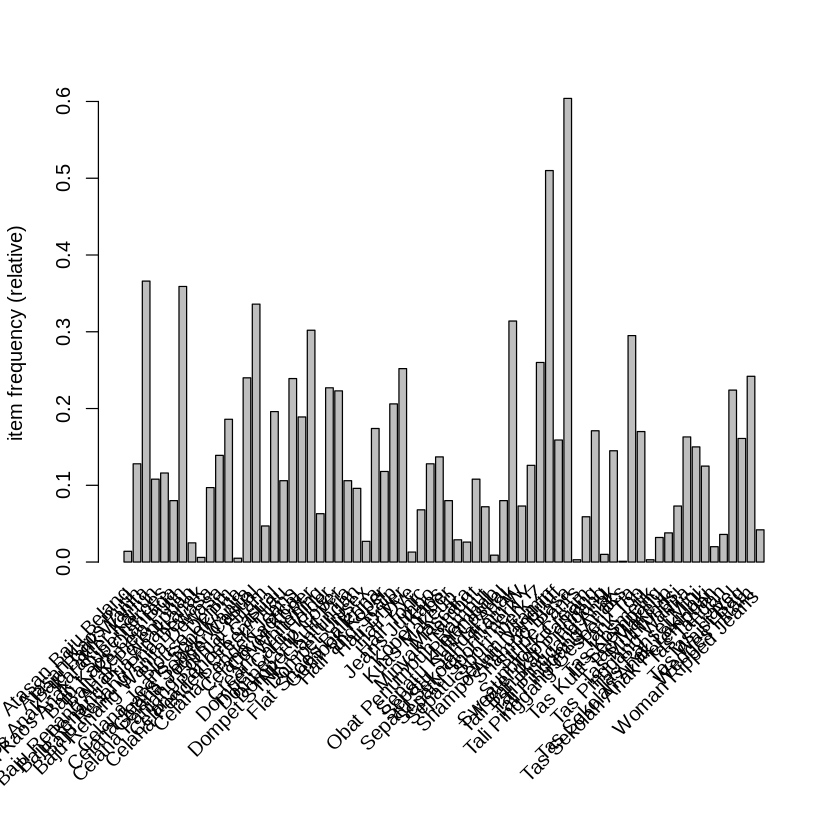

In [27]:
itemFrequencyPlot(transaksi, type = c("relative", "absolute"))


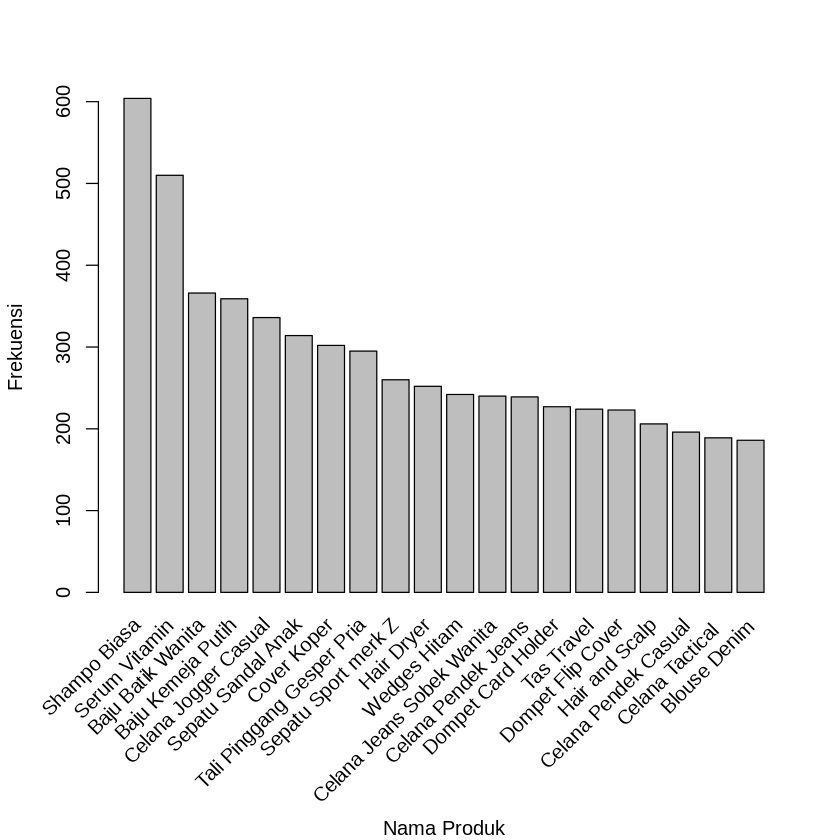

In [32]:
itemFrequencyPlot(transaksi, topN=20, type='absolute', xlab = "Nama Produk", ylab = "Frekuensi")

# **Visualisasi Rules dengan Graph**
Sejauh ini Anda telah menghasilkan rules dan mengerti bagaimana metrik kualitas dapat digunakan sebagai basis pemilihan rule.

Namun ketika item semakin banyak, maka proses memilih berdasarkan angka-angka saja cukup merepotkan. Kadangkala visualisasi bisa sangat membantu analisa di proses ini.

Jenis visualisasi cukup banyak, namun kita akan gunakan visualisasi bertipe graph yang terdapat pada package arulesViz – suatu package dengan visualisasi khusus untuk association rules.

In [20]:
install.packages("arulesViz")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘gridExtra’, ‘bitops’, ‘coda’, ‘foreach’, ‘viridis’, ‘gtools’, ‘caTools’, ‘zoo’, ‘statnet.common’, ‘later’, ‘TSP’, ‘qap’, ‘gclus’, ‘dendextend’, ‘gplots’, ‘registry’, ‘lmtest’, ‘ggrepel’, ‘network’, ‘sna’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘lazyeval’, ‘seriation’, ‘vcd’, ‘igraph’, ‘scatterplot3d’, ‘ggnetwork’, ‘DT’, ‘plotly’, ‘visNetwork’




In [23]:
library("arulesViz")

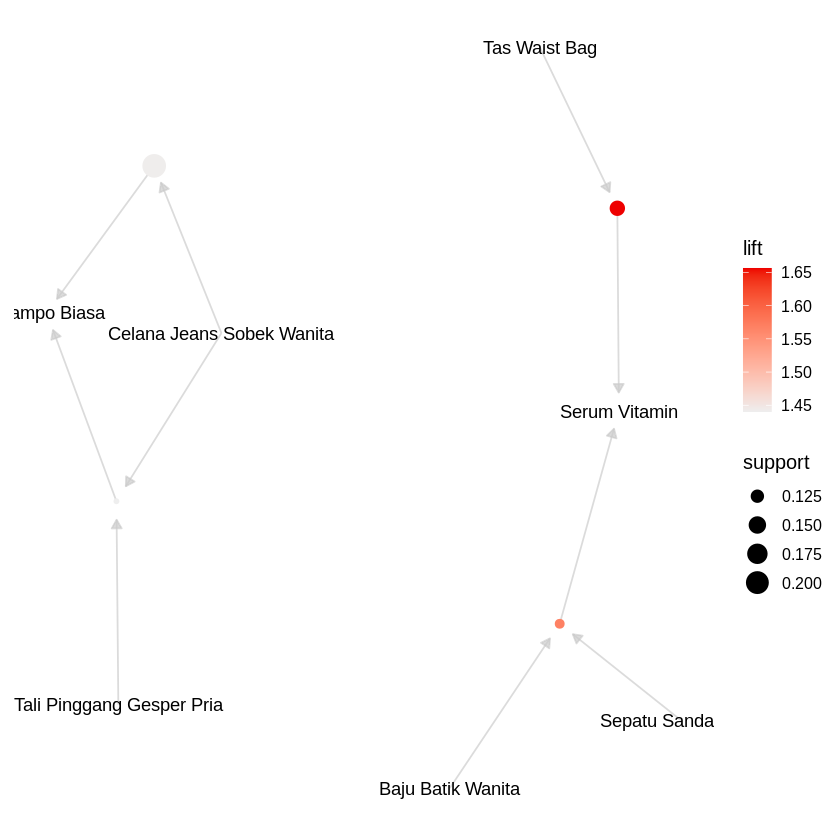

In [24]:
plot(subset(mba, lift>1.1), method="graph")

**Conclusion :**
Tas Waist Bag cocok dijadikan menu package bersama dengan Serum Vitamin